In [44]:
import pandas as pd

In [45]:
data = {'Name':["John","Anna","Peter","Linda"],
        'Location':["New York","Paris","Berlin","London"],
       'Age':[24,13,53,33]}
data_pd=pd.DataFrame(data)
display(data_pd)

,Name,Location,Age
0,John,New York,24
1,Anna,Paris,13
2,Peter,Berlin,53
3,Linda,London,33


In [46]:
data_pd["Age"]

0    24
1    13
2    53
3    33
Name: Age, dtype: int64

In [47]:
data_pd["Age"]>24

0    False
1    False
2     True
3     True
Name: Age, dtype: bool

# Flowers classification

In [19]:
import numpy as np 
import matplotlib.pyplot as plt 
from IPython.display import display 
import pandas as pd 

In [49]:
from sklearn.datasets import load_iris

In [50]:
iris_dataset = load_iris()

In [51]:
print("Keys iris_dataset: \n{}".format(iris_dataset.keys()))

Keys iris_dataset: 
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [52]:
print("Names labels: {}".format(iris_dataset['target_names']))

Names labels: ['setosa' 'versicolor' 'virginica']


In [53]:
print("labels: {}".format(iris_dataset['target']))

labels: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [1]:
import mglearn

C:\Users\Nikita\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [55]:
print("data:{}".format(iris_dataset['feature_names']))

data:['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [56]:
print("Первые пять строк массива data:\n{}".format(iris_dataset['data'][:5]))

Первые пять строк массива data:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


### train - test - split

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'],
                                                    iris_dataset['target'],
                                                    random_state=0) 

In [58]:
print("X_train shape: ",X_train.shape)
print("X_test shape: ",X_test.shape)

X_train shape:  (112, 4)
X_test shape:  (38, 4)


In [59]:
print("y_train shape: ",y_train.shape)
print("y_test shape: ",y_test.shape)

y_train shape:  (112,)
y_test shape:  (38,)


### подготовка данных, проверка данных

In [60]:
# создаем dataframe из данных в массиве X _ train # маркируем столбцы, используя строки в iris _ dataset . feature _ names
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names) 
# создаем матрицу рассеяния из dataframe , цвет точек задаем с помощью y _ train 

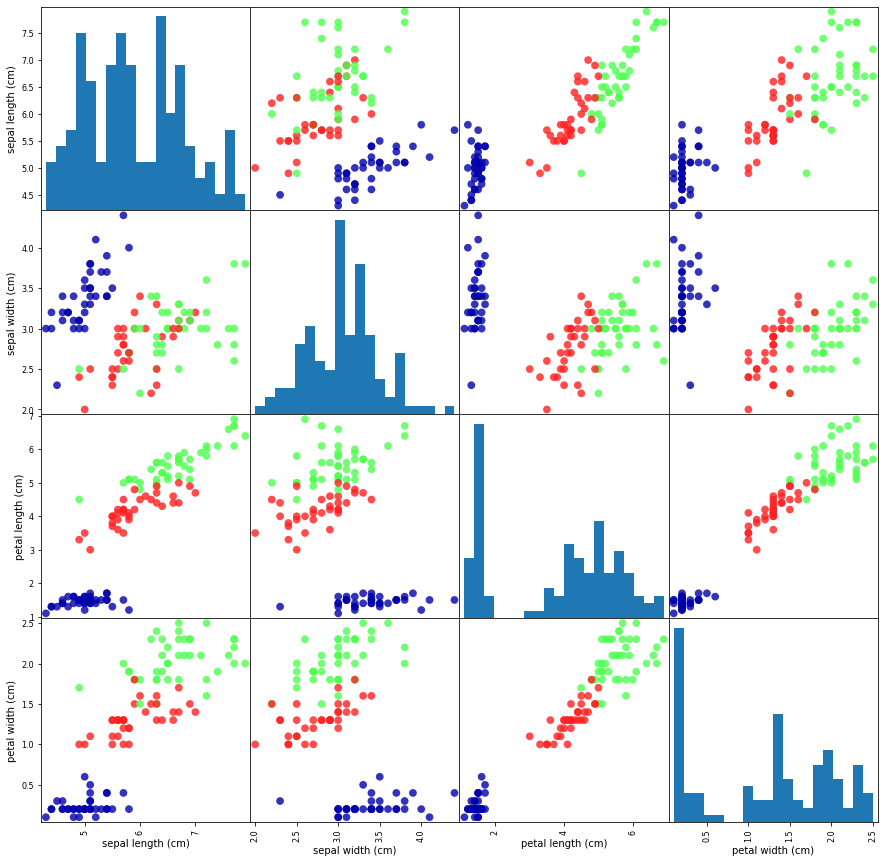

In [64]:
from pandas.plotting import scatter_matrix
grr = scatter_matrix(iris_dataframe, c=y_train, figsize=(15, 15), marker='o',
                        hist_kwds={'bins': 20}, s=60, alpha=.8, cmap=mglearn.cm3) 

## $k$NN

In [65]:
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors=1) 

In [66]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [67]:
X_new = np.array([[5, 2.9, 1, 0.2]])
print("форма массива X_new: {}".format(X_new.shape)) 

форма массива X_new: (1, 4)


In [68]:
prediction = knn.predict(X_new) 
print("Прогноз: {}".format(prediction)) 
print("Спрогнозированная метка: {}".format(iris_dataset['target_names'][prediction])) 

Прогноз: [0]
Спрогнозированная метка: ['setosa']


### Прогноз

In [69]:
y_pred = knn.predict(X_test) 
print("Прогнозы для тестового набора:\n {}".format(y_pred)) 

Прогнозы для тестового набора:
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [70]:
y_test_err = np.mean(y_pred == y_test)
print("Error:", y_test_err)

Error: 0.9736842105263158


In [71]:
print("Error train:", knn.score(X_test,y_test))

Error train: 0.9736842105263158


# Глава 2

форма массива X: (26, 2)


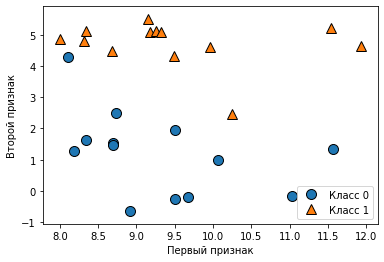

In [73]:
# генерируем набор данных
X, y = mglearn.datasets.make_forge()
# строим график для набора данных 
%matplotlib inline
mglearn.discrete_scatter(X[:, 0], X[:, 1], y) 
plt.legend(["Класс 0", "Класс 1"], loc=4)
plt.xlabel("Первый признак")
plt.ylabel("Второй признак") 
print("форма массива X: {}".format(X.shape))

Text(0, 0.5, 'Целевая переменная')

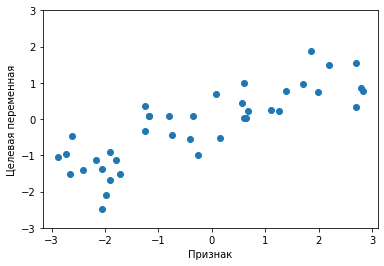

In [74]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o') 
plt.ylim(-3, 3)
plt.xlabel("Признак") 
plt.ylabel("Целевая переменная") 

## Опухоль

In [75]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print(cancer.keys())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [77]:
print("Количество примеров для каждого класса:\n{}".format( 
    {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))})) 

Количество примеров для каждого класса:
{'malignant': 212, 'benign': 357}


In [78]:
print("Имена признаков:\n{}".format(cancer.feature_names)) 


Имена признаков:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [79]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

## Бостон

In [7]:
from sklearn.datasets import load_boston
boston = load_boston()
print("Shape: ",boston.data.shape)

Shape:  (506, 13)


In [8]:
X,y = mglearn.datasets.load_extended_boston()
print("Shape:",X.shape)

Shape: (506, 104)


## Тест 2

In [82]:
X, y = mglearn.datasets.make_forge() 
 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [84]:
clf = KNeighborsClassifier(n_neighbors=3)

In [85]:
clf.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [86]:
print("Прогнозы на тестовом наборе: {}".format(clf.predict(X_test)))

Прогнозы на тестовом наборе: [1 0 1 0 1 0 0]


In [87]:
print("Правильность на тестовом наборе: {:.2f}".format(
    clf.score(X_test, y_test))) 

Правильность на тестовом наборе: 0.86


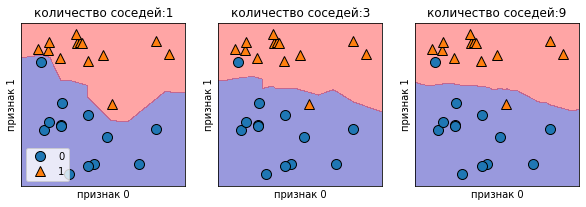

In [90]:
fig,axes = plt.subplots(1,3,figsize=(10,3))

for n_neighbors,ax in zip([1,3,9], axes):
    clf=KNeighborsClassifier(n_neighbors = n_neighbors).fit(X,y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)     
    ax.set_title("количество соседей:{}".format(n_neighbors))    
    ax.set_xlabel("признак 0")   
    ax.set_ylabel("признак 1")
axes[0].legend(loc=3)

#### Связь количества соседей и ошибки на данных cancer

In [91]:
X_train, X_test, y_train, y_test = train_test_split( 
    cancer.data, cancer.target, stratify=cancer.target, random_state=66) 

In [92]:
training_accuracy  = []
test_accuracy = []
neighbors_settings = range(1,11)

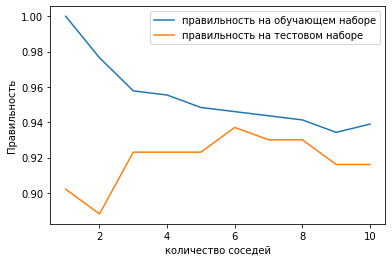

In [93]:
for n_neighbors in neighbors_settings: 
    # строим модель     
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train) 
    # записываем правильность на обучающем наборе
    training_accuracy.append(clf.score(X_train, y_train))
    # записываем правильность на тестовом наборе  
    test_accuracy.append(clf.score(X_test, y_test)) 
 
plt.plot(neighbors_settings, training_accuracy, label="правильность на обучающем наборе") 
plt.plot(neighbors_settings, test_accuracy, label="правильность на тестовом наборе") 
plt.ylabel("Правильность") 
plt.xlabel("количество соседей")
plt.legend() 

### регрессия k ближайших соседей 

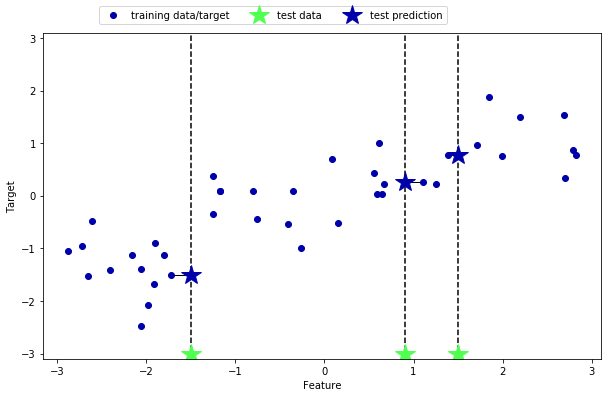

In [94]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

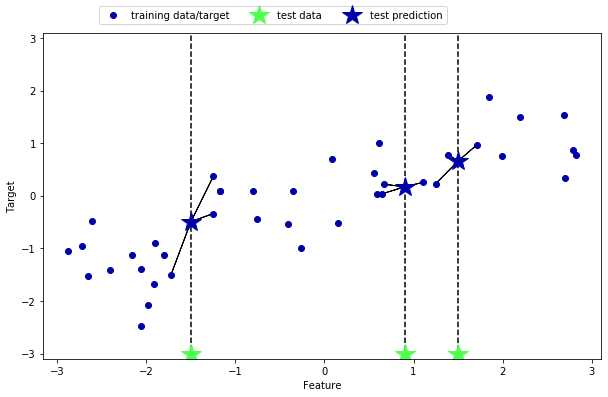

In [95]:
mglearn.plots.plot_knn_regression(n_neighbors=3) 

In [96]:
from sklearn.neighbors import KNeighborsRegressor 

In [97]:
X, y = mglearn.datasets.make_wave(n_samples=40)

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0) 
 

In [99]:
reg = KNeighborsRegressor(n_neighbors=3) # подгоняем модель с использованием обучающих данных и обучающих ответов 
reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [100]:
print("Прогнозы для тестового набора:\n{}".format(reg.predict(X_test))) 

Прогнозы для тестового набора:
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [101]:
In[23]: print("R^2 на тестовом наборе: {:.2f}".format(reg.score(X_test, y_test))) 


R^2 на тестовом наборе: 0.83


## Анализ модели KNeighborsRegressor

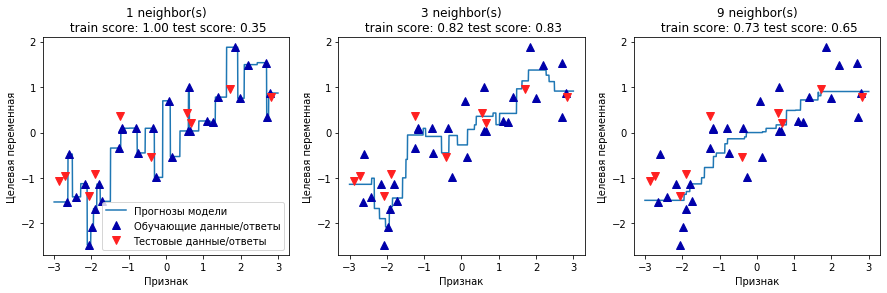

In [105]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
line = np.linspace(-3, 3, 1000).reshape(-1, 1) 

for n_neighbors, ax in zip([1, 3, 9], axes): 
        reg = KNeighborsRegressor(n_neighbors=n_neighbors)    
        reg.fit(X_train, y_train)     
        ax.plot(line, reg.predict(line))   
        ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)  
        ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)    
        ax.set_title(  "{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format( 
            n_neighbors, reg.score(X_train, y_train),reg.score(X_test, y_test)))  
        ax.set_xlabel("Признак")  
        ax.set_ylabel("Целевая переменная") 
        
axes[0].legend(["Прогнозы модели", "Обучающие данные/ответы",  
                    "Тестовые данные/ответы"], loc="best") 

## Линейные модели

w[0]: 0.393906  b: -0.031804


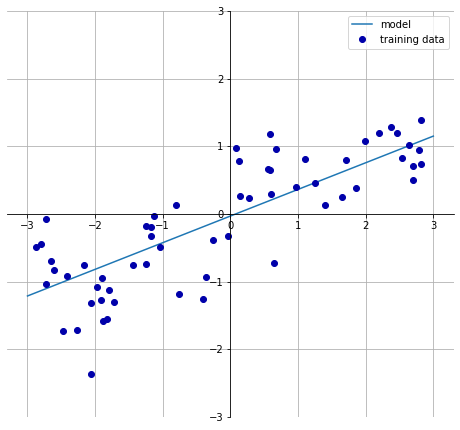

In [106]:
mglearn.plots.plot_linear_regression_wave() 

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_wave(n_samples=60) 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42) 
 
lr = LinearRegression().fit(X_train, y_train) 

In [108]:
print("lr.coef_: {}".format(lr.coef_)) 
print("lr.intercept_: {}".format(lr.intercept_)) 


lr.coef_: [0.39390555]
lr.intercept_: -0.03180434302675973


In [109]:
print("Правильность на обучающем наборе: {:.2f}".format(lr.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.2f}".format(lr.score(X_test, y_test))) 

Правильность на обучающем наборе: 0.67
Правильность на тестовом наборе: 0.66


##### Линейная регрессия на данных "Бостон"

In [16]:
X, y = mglearn.datasets.load_extended_boston() 
 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train) 

In [17]:
print("Правильность на обучающем наборе: {:.2f}".format(lr.score(X_train, y_train))) 
print("Правильность на тестовом наборе: {:.2f}".format(lr.score(X_test, y_test)))

Правильность на обучающем наборе: 0.95
Правильность на тестовом наборе: 0.61


### Гребневая регрессия (Ridge)

In [9]:
from sklearn.linear_model import Ridge

In [12]:
ridge = Ridge().fit(X_train, y_train)
print("Правильность на обучающем наборе: {:.2f}".format(ridge.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.2f}".format(ridge.score(X_test, y_test))) 

Правильность на обучающем наборе: 0.89
Правильность на тестовом наборе: 0.75


In [13]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train) 
print("Правильность на обучающем наборе: {:.2f}".format(ridge10.score(X_train, y_train))) 
print("Правильность на тестовом наборе: {:.2f}".format(ridge10.score(X_test, y_test))) 
 

Правильность на обучающем наборе: 0.79
Правильность на тестовом наборе: 0.64


In [14]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Правильность на обучающем наборе: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.2f}".format(ridge01.score(X_test, y_test))) 
 

Правильность на обучающем наборе: 0.93
Правильность на тестовом наборе: 0.77


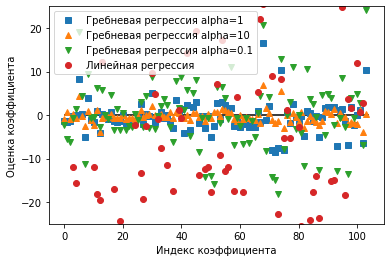

In [20]:
plt.plot(ridge.coef_, 's', label="Гребневая регрессия alpha=1") 
plt.plot(ridge10.coef_, '^', label="Гребневая регрессия alpha=10")
plt.plot(ridge01.coef_, 'v', label="Гребневая регрессия alpha=0.1") 
 
plt.plot(lr.coef_, 'o', label="Линейная регрессия") 
plt.xlabel("Индекс коэффициента") 
plt.ylabel("Оценка коэффициента")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()

### Лассо

In [21]:
from sklearn.linear_model import Lasso 
 
lasso = Lasso().fit(X_train, y_train) 
print("Правильность на обучающем наборе: {:.2f}".format(lasso.score(X_train, y_train))) 
print("Правильность на контрольном наборе: {:.2f}".format(lasso.score(X_test, y_test))) 
print("Количество использованных признаков: {}".format(np.sum(lasso.coef_ != 0))) 

Правильность на обучающем наборе: 0.29
Правильность на контрольном наборе: 0.21
Количество использованных признаков: 4


In [23]:
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train) 
print("Правильность на обучающем наборе: {:.2f}".format(lasso001.score(X_train, y_train))) 
print("Правильность на тестовом наборе: {:.2f}".format(lasso001.score(X_test, y_test))) 
print("Количество использованных признаков: {}".format(np.sum(lasso001.coef_ != 0)))

Правильность на обучающем наборе: 0.90
Правильность на тестовом наборе: 0.77
Количество использованных признаков: 33


In [24]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train) 
print("Правильность на обучающем наборе: {:.2f}".format(lasso00001.score(X_train, y_train))) 
print("Правильность на тестовом наборе: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Количество использованных признаков: {}".format(np.sum(lasso00001.coef_ != 0))) 
 

Правильность на обучающем наборе: 0.95
Правильность на тестовом наборе: 0.64
Количество использованных признаков: 96


Text(0, 0.5, 'Оценка коэффициента')

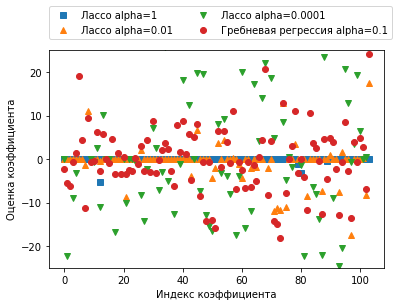

In [25]:
plt.plot(lasso.coef_, 's', label="Лассо alpha=1")
plt.plot(lasso001.coef_, '^', label="Лассо alpha=0.01") 
plt.plot(lasso00001.coef_, 'v', label="Лассо alpha=0.0001") 
plt.plot(ridge01.coef_, 'o', label="Гребневая регрессия alpha=0.1") 

plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25) 
plt.xlabel("Индекс коэффициента")
plt.ylabel("Оценка коэффициента")   

### Логистическая регрессия и SVC

C:\Users\Nikita\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Nikita\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


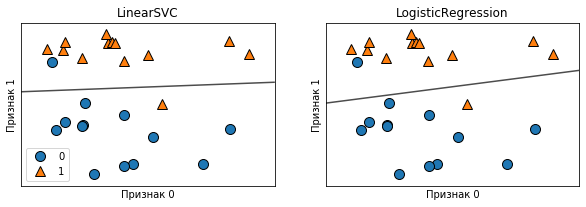

In [26]:
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import LinearSVC 
 
X, y = mglearn.datasets.make_forge() 
 
fig, axes = plt.subplots(1, 2, figsize=(10, 3)) 
 
for model, ax in zip([LinearSVC(), LogisticRegression()], axes):    
    clf = model.fit(X, y)    
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, 
                                    ax=ax, alpha=.7)     
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)     
    ax.set_title("{}".format(clf.__class__.__name__))  
    ax.set_xlabel("Признак 0")  
    ax.set_ylabel("Признак 1") 
axes[0].legend()

In [27]:
from sklearn.datasets import load_breast_cancer 
cancer = load_breast_cancer() 
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    stratify=cancer.target,
                                                    random_state=42)
logreg = LogisticRegression().fit(X_train, y_train) 
print("Правильность на обучающем наборе: {:.3f}".format(logreg.score(X_train, y_train))) 
print("Правильность на тестовом наборе: {:.3f}".format(logreg.score(X_test, y_test))) 
 

Правильность на обучающем наборе: 0.955
Правильность на тестовом наборе: 0.958


C:\Users\Nikita\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [28]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train) 
print("Правильность на обучающем наборе: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(logreg100.score(X_test, y_test)))

Правильность на обучающем наборе: 0.972
Правильность на тестовом наборе: 0.965


C:\Users\Nikita\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### один против всех

L1 регуляция - функция штрафа в квадрате $\lambda|\omega|^2$, L2 - $\lambda|\omega|$

In [29]:
from sklearn.datasets import make_blobs

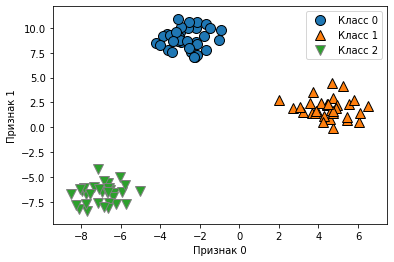

In [30]:
X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y) 
plt.xlabel("Признак 0") 
plt.ylabel("Признак 1") 
plt.legend(["Класс 0", "Класс 1", "Класс 2"]) 

In [31]:
linear_svm = LinearSVC().fit(X, y)
print("Форма коэффициента: ", linear_svm.coef_.shape) 
print("Форма константы: ", linear_svm.intercept_.shape) 

Форма коэффициента:  (3, 2)
Форма константы:  (3,)


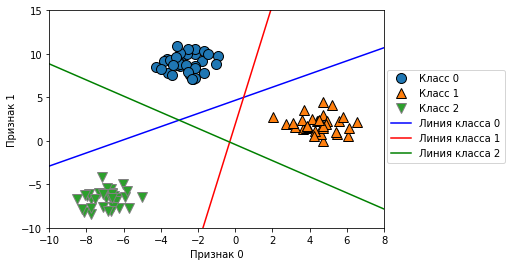

In [32]:
# форма коэфф (3,2) по два значения на каждый класс

mglearn.discrete_scatter(X[:, 0], X[:, 1], y) 
line = np.linspace(-15, 15) 
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, 
                                  ['b', 'r', 'g']): 
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
    
plt.ylim(-10, 15) 
plt.xlim(-10, 8) 
plt.xlabel("Признак 0")
plt.ylabel("Признак 1") 
plt.legend(['Класс 0', 'Класс 1', 'Класс 2', 'Линия класса 0', 'Линия класса 1',            
                'Линия класса 2'], loc=(1.01, 0.3)) 
 

Text(0, 0.5, 'Признак 1')

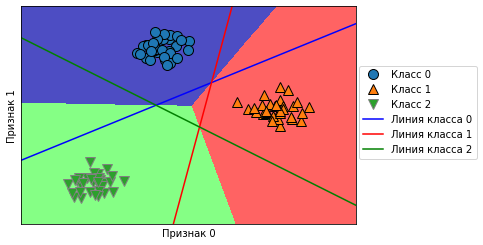

In [38]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,['b', 'r', 'g']):   
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color) 
    
plt.legend(['Класс 0', 'Класс 1', 'Класс 2', 'Линия класса 0', 
            'Линия класса 1', 'Линия класса 2'], loc=(1.01, 0.3))
plt.xlabel("Признак 0") 
plt.ylabel("Признак 1")

## Деревья решений

In [39]:
from sklearn.tree import DecisionTreeClassifier 
 
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(     cancer.data, cancer.target, stratify=cancer.target,
                                                    random_state=42)
tree = DecisionTreeClassifier(random_state=0) 
tree.fit(X_train, y_train)
print("Правильность на обучающем наборе: {:.3f}".format(tree.score(X_train, y_train))) 
print("Правильность на тестовом наборе: {:.3f}".format(tree.score(X_test, y_test))) 

Правильность на обучающем наборе: 1.000
Правильность на тестовом наборе: 0.937


ошибка на обучающем наборе равная 0(или же правильность - 1) является признаком переобучения. Необходимо сделать обрезку.

In [44]:
tree = DecisionTreeClassifier(max_depth=2, random_state=0) 
tree.fit(X_train, y_train) 
 
print("Правильность на обучающем наборе: {:.3f}".format(tree.score(X_train, y_train))) 
print("Правильность на тестовом наборе: {:.3f}".format(tree.score(X_test, y_test))) 
 


Правильность на обучающем наборе: 0.958
Правильность на тестовом наборе: 0.909


### Анализ и визуализация деревьев

In [45]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["malignant", "benign"],               
                                                         feature_names=cancer.feature_names, impurity=False, filled=True) 

In [48]:
import graphviz 
 
with open("tree.dot") as f:  
    dot_graph = f.read()
graphviz.Source(dot_graph) 

ModuleNotFoundError: No module named 'graphviz'

#### Важность признаков 

AttributeError: module 'sklearn.tree' has no attribute 'feature_importances_'

Text(0, 0.5, 'Цена $/Мбайт')

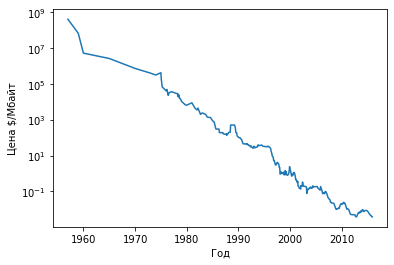

In [54]:
import pandas as pd 
ram_prices = pd.read_csv("ram_price.csv") 
 
plt.semilogy(ram_prices.date, ram_prices.price) 
plt.xlabel("Год") 
plt.ylabel("Цена $/Мбайт")

### регрессия на основе деревьев решений

In [55]:
from sklearn.tree import DecisionTreeRegressor 
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000] 

In [56]:
# прогнозируем цены по датам
X_train = data_train.date[:, np.newaxis]
# мы используем логпреобразование , что получить простую взаимосвязь между данными и откликом 
y_train = np.log(data_train.price) 

In [57]:
tree = DecisionTreeRegressor().fit(X_train, y_train) 
linear_reg = LinearRegression().fit(X_train, y_train) 


In [59]:
# прогнозируем по всем данным 
X_all = ram_prices.date[:, np.newaxis] 
pred_tree = tree.predict(X_all) 
pred_lr = linear_reg.predict(X_all) 
 
# экспоне н цируем, чтобы обратить логарифмическое преобразование 
price_tree = np.exp(pred_tree) 
price_lr = np.exp(pred_lr)

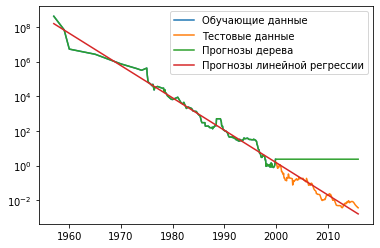

In [60]:
plt.semilogy(data_train.date, data_train.price, label="Обучающие данные")
plt.semilogy(data_test.date, data_test.price, label="Тестовые данные") 
plt.semilogy(ram_prices.date, price_tree, label="Прогнозы дерева") 
plt.semilogy(ram_prices.date, price_lr, label="Прогнозы линейной регрессии")
plt.legend() 
 

Обычно, чтобы предотвратить переобучение, достаточно выбрать одну из стратегий предварительной обрезки – настроить max_depth, max_leaf_nodes или min_samples_leaf

## Ансамбли деревьев